In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('health care diabetes.csv')

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


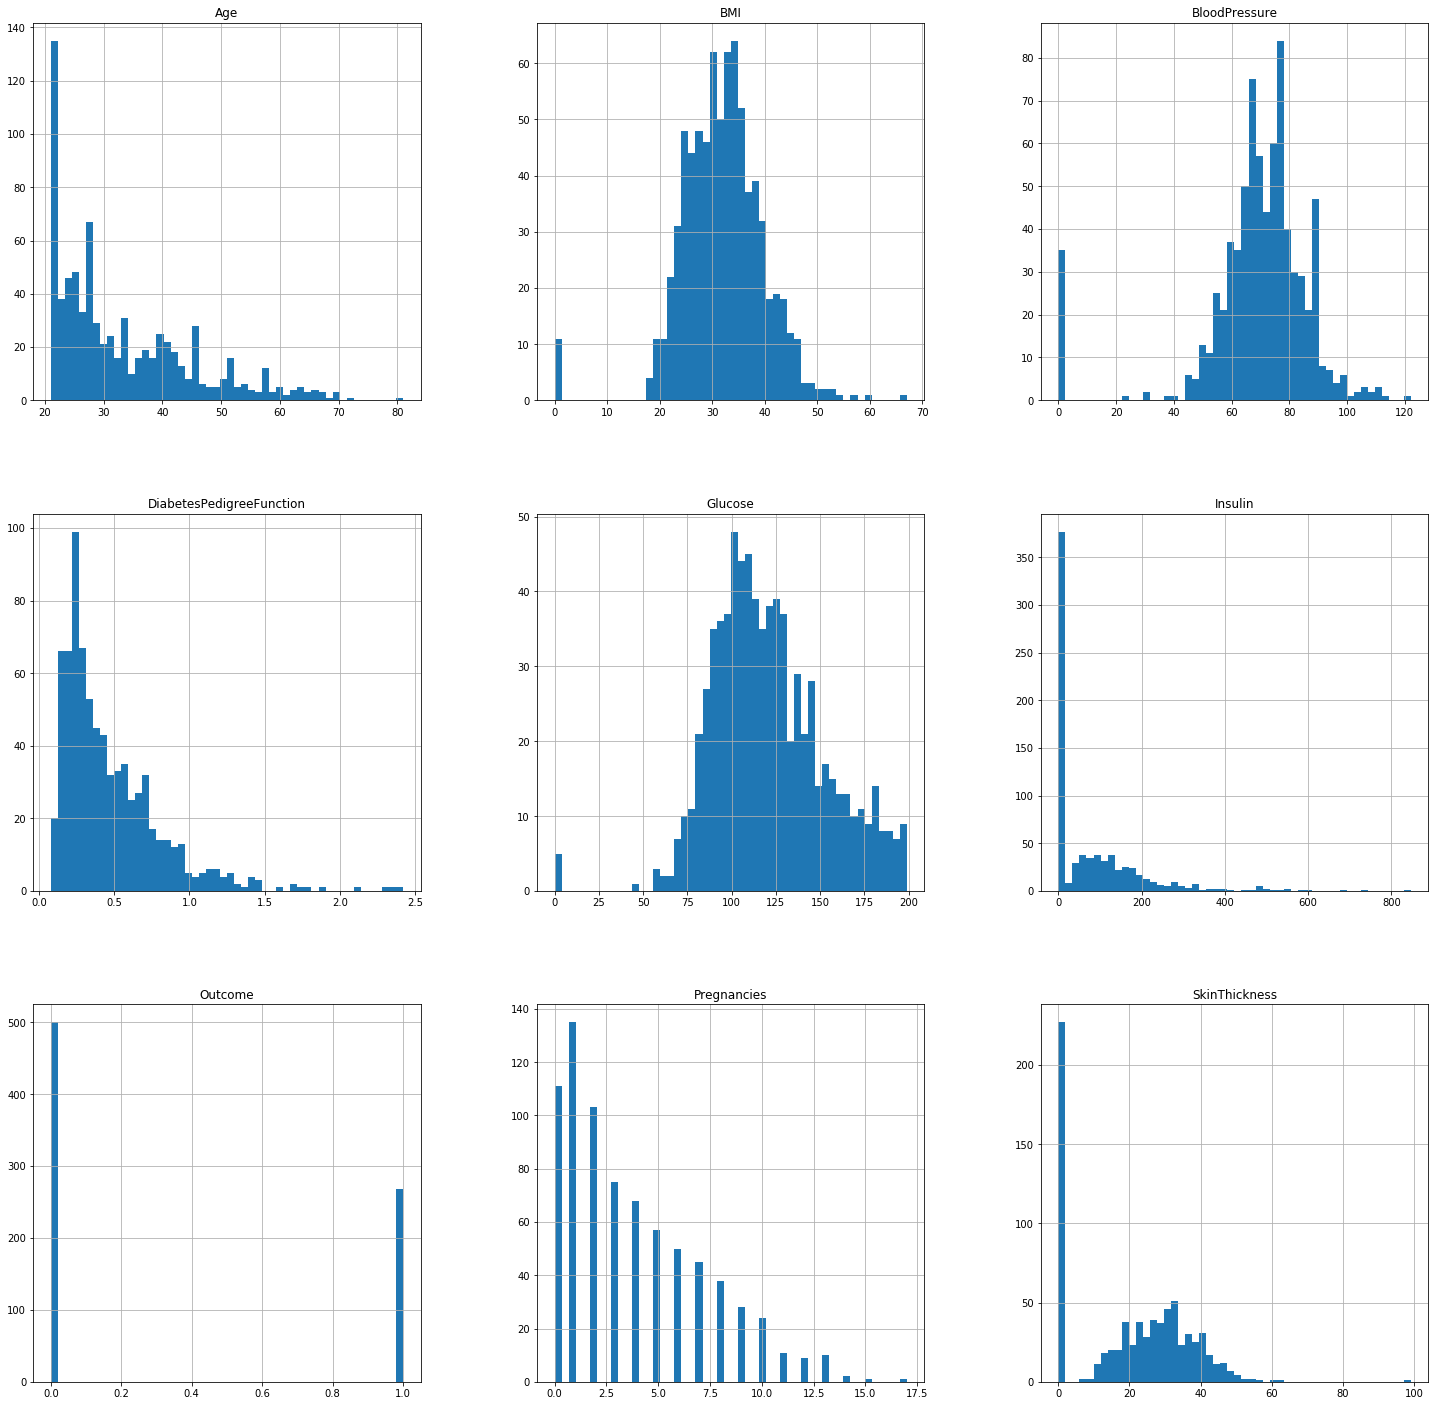

In [4]:
data.hist(figsize=(25,25),bins=50);

In [5]:
print('Glucose',type('Glucose'),data.Glucose.count())
print('BloodPressure',type('BloodPressure'),data.BloodPressure.count())
print('SkinThickness',type('SkinThickness'),data.SkinThickness.count())
print('Insulin',type('Insulin'),data.Insulin.count())
print('BMI',type('BMI'),data.BMI.count())

Glucose <class 'str'> 768
BloodPressure <class 'str'> 768
SkinThickness <class 'str'> 768
Insulin <class 'str'> 768
BMI <class 'str'> 768


In [6]:
print((data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [7]:
data[['Glucose']] = data[['Glucose']].replace(0, np.NaN)
data.Glucose.fillna(data.Glucose.mean(), inplace=True)

In [8]:
data[['BloodPressure']] = data[['BloodPressure']].replace(0, np.NaN)
data.BloodPressure.fillna(data.BloodPressure.mean(), inplace=True)

In [9]:
data[['BMI']] = data[['BMI']].replace(0, np.NaN)
data.BMI.fillna(data.BMI.mean(), inplace=True)

In [10]:
data[['SkinThickness']] = data[['SkinThickness']].replace(0, np.NaN)
data.SkinThickness.fillna(data.SkinThickness.mean(), inplace=True)

In [11]:
data[['Insulin']] = data[['Insulin']].replace(0, np.NaN)
data.Insulin.fillna(data.Insulin.mean(), inplace=True)

In [12]:
print('Glucose',type('Glucose'),data.Glucose.count())
print('BloodPressure',type('BloodPressure'),data.BloodPressure.count())
print('SkinThickness',type('SkinThickness'),data.SkinThickness.count())
print('Insulin',type('Insulin'),data.Insulin.count())
print('BMI',type('BMI'),data.BMI.count())

Glucose <class 'str'> 768
BloodPressure <class 'str'> 768
SkinThickness <class 'str'> 768
Insulin <class 'str'> 768
BMI <class 'str'> 768


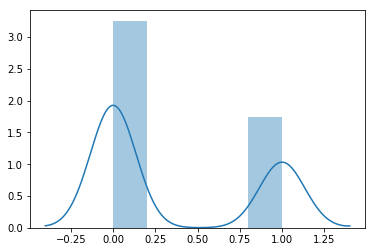

In [13]:
sns.distplot(data[['Outcome']])

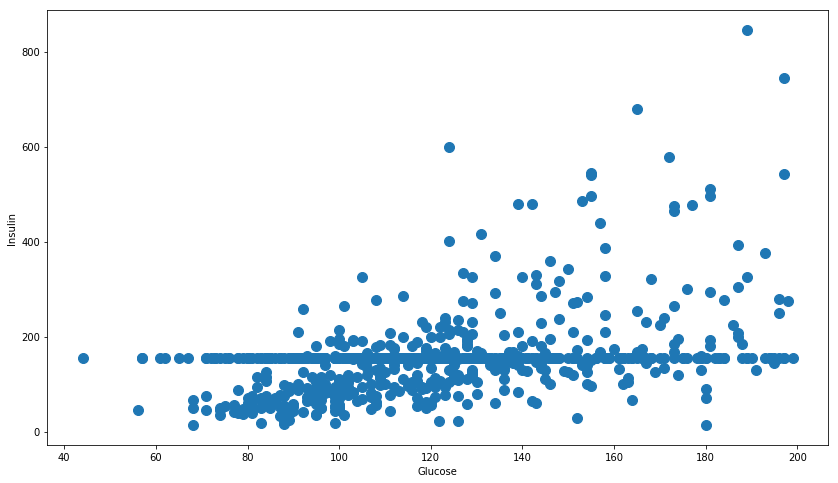

In [31]:
data.plot.scatter(x='Glucose', y='Insulin', figsize=(14,8),s=100 );

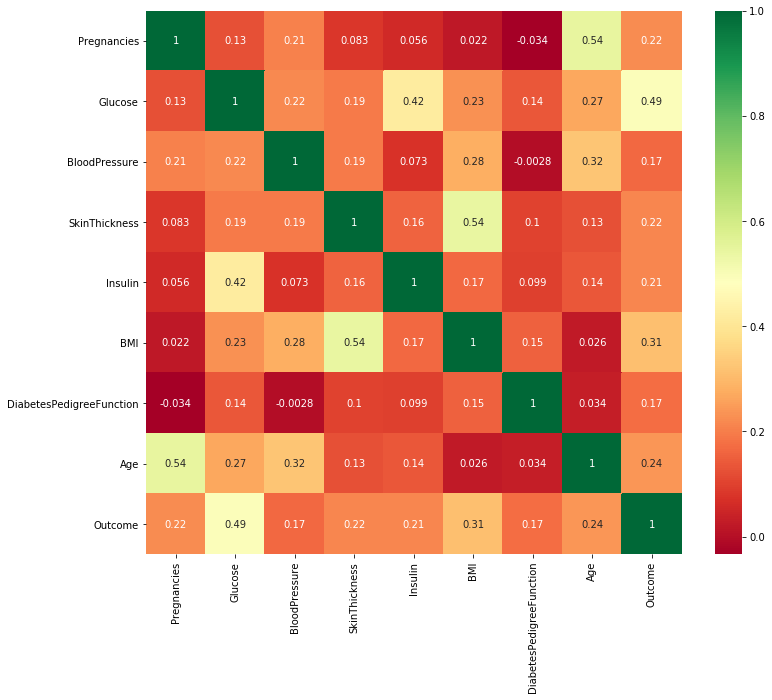

In [28]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  

In [27]:
data_ind = data.drop("Outcome",axis=1)
print(data_ind.head())
data_dep = data["Outcome"]
print("Outcome")
print(data_dep.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
Outcome
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
data_ind = data.drop("col",axis=1)
print(data_ind.head())
data_dep = data["col"]
print("Medain Housing Values")
print(data_dep.head())

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_ind,data_dep,test_size=0.2,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.fit_transform(X_test)

C:\Users\yashg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yashg\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\yashg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yashg\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(26)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7857142857142857

In [55]:
knn.score(X_test,y_test)

0.7857142857142857

In [56]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[88, 11],
       [22, 33]], dtype=int64)

In [66]:
#caluclating the accuracy by confusion matrix
x=(88+33)
y=(88+33+22+11)
accuracy= x/y
print(accuracy*100)

78.57142857142857


In [72]:
cm1=confusion_matrix(y_test,y_pred)
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.8888888888888888
Specificity :  0.6


In [73]:
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Accuracy :  0.7857142857142857


In [67]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

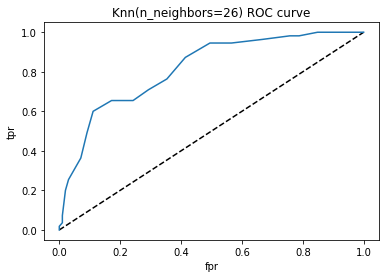

In [70]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=26) ROC curve')
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8155188246097337